In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [313]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import  OneHotEncoder

from sklearn.model_selection import cross_val_score

## EDA

In [337]:
df = pd.read_csv('./data/train.csv')

In [338]:
df.shape

(16784, 30)

In [339]:
df.columns

Index(['listing_id', 'title', 'make', 'model', 'description', 'manufactured',
       'original_reg_date', 'reg_date', 'type_of_vehicle', 'category',
       'transmission', 'curb_weight', 'power', 'fuel_type', 'engine_cap',
       'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value',
       'mileage', 'omv', 'arf', 'opc_scheme', 'lifespan', 'eco_category',
       'features', 'accessories', 'indicative_price', 'price'],
      dtype='object')

### data analysis  

In [340]:
def summary(df, pred='price'): 
    
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: x.unique())
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        print("xxxxx")
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ratio', 'uniques', 'skewness', 'kurtosis']
        dd = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr(method='pearson')[pred]
        print(corr)
        dd = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1)
        print(dd.columns)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ratio', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    dd.columns = cols
    dtypes = dd.types.value_counts()
    print('___________________________\nData types:\n',dd.types.value_counts())
    print('___________________________')
    dd = dd.sort_values(by='corr '+pred)
    return dd

In [341]:
dd = summary(df)

Data shape: (16784, 30)
listing_id         -0.124911
manufactured        0.142768
curb_weight         0.138473
power               0.769550
engine_cap          0.418161
no_of_owners       -0.092642
depreciation        0.631857
coe                 0.047125
road_tax            0.610232
dereg_value         0.894838
mileage            -0.387148
omv                 0.804580
arf                 0.884832
indicative_price         NaN
price               1.000000
Name: price, dtype: float64
Index([0, 1, 2, 3, 4, 5, 6, 7, 'price'], dtype='object')
___________________________
Data types:
 object     15
float64    14
int64       1
Name: types, dtype: int64
___________________________


/var/folders/5v/mqn333td7yzb_6v8h6qv6yhc0000gn/T/ipykernel_20301/3637308042.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew()
/var/folders/5v/mqn333td7yzb_6v8h6qv6yhc0000gn/T/ipykernel_20301/3637308042.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis = df.kurt()


In [342]:
dd

,types,counts,distincts,nulls,missing_ratio,uniques,skewness,kurtosis,corr price
mileage,float64,13060,4642,3724,22.187798,"[73000.0, 110112.0, 80000.0, 9800.0, 40000.0, ...",1.022990,3.712637,-0.387148
listing_id,int64,16784,16728,0,0.000000,"[1030324, 1021510, 1026909, 1019371, 1031014, ...",-5.693298,76.261963,-0.124911
no_of_owners,float64,16608,7,176,1.048618,"[1.0, 3.0, nan, 2.0, 5.0, 4.0, 6.0]",1.371869,1.099485,-0.092642
coe,float64,15893,2103,891,5.308627,"[77100.0, 10660.0, 53694.0, 40690.0, 26667.0, ...",0.204651,0.324743,0.047125
curb_weight,float64,16205,796,579,3.449714,"[1560.0, 1740.0, 1430.0, 1635.0, 1237.0, nan, ...",10.937526,154.935010,0.138473
manufactured,float64,16590,62,194,1.155863,"[2013.0, 2014.0, 2016.0, 2019.0, nan, 2015.0, ...",66.908691,7009.408343,0.142768
engine_cap,float64,16731,333,53,0.315777,"[1997.0, 2982.0, 1595.0, 1497.0, 1597.0, 1991....",5.111352,42.906256,0.418161
road_tax,float64,14630,543,2154,12.833651,"[1210.0, nan, 740.0, 684.0, 742.0, 1202.0, 392...",3.153464,12.759632,0.610232
depreciation,float64,16351,2894,433,2.579838,"[17700.0, 11630.0, 15070.0, 16400.0, 10450.0, ...",18.124309,551.935735,0.631857
power,float64,14447,302,2337,13.923975,"[135.0, nan, 90.0, 115.0, 92.0, 225.0, 375.0, ...",2.387758,6.374501,0.769550


In [320]:
dd[(dd['missing_ratio']<70) & (dd['distincts']>=2)].drop(index=['listing_id','price']).shape

(22, 9)

In [321]:
dd

,types,counts,distincts,nulls,missing_ratio,uniques,skewness,kurtosis,corr price
mileage,float64,13060,4642,3724,22.187798,"[73000.0, 110112.0, 80000.0, 9800.0, 40000.0, ...",1.022990,3.712637,-0.387148
listing_id,int64,16784,16728,0,0.000000,"[1030324, 1021510, 1026909, 1019371, 1031014, ...",-5.693298,76.261963,-0.124911
no_of_owners,float64,16608,7,176,1.048618,"[1.0, 3.0, nan, 2.0, 5.0, 4.0, 6.0]",1.371869,1.099485,-0.092642
coe,float64,15893,2103,891,5.308627,"[77100.0, 10660.0, 53694.0, 40690.0, 26667.0, ...",0.204651,0.324743,0.047125
curb_weight,float64,16205,796,579,3.449714,"[1560.0, 1740.0, 1430.0, 1635.0, 1237.0, nan, ...",10.937526,154.935010,0.138473
manufactured,float64,16590,62,194,1.155863,"[2013.0, 2014.0, 2016.0, 2019.0, nan, 2015.0, ...",66.908691,7009.408343,0.142768
engine_cap,float64,16731,333,53,0.315777,"[1997.0, 2982.0, 1595.0, 1497.0, 1597.0, 1991....",5.111352,42.906256,0.418161
road_tax,float64,14630,543,2154,12.833651,"[1210.0, nan, 740.0, 684.0, 742.0, 1202.0, 392...",3.153464,12.759632,0.610232
depreciation,float64,16351,2894,433,2.579838,"[17700.0, 11630.0, 15070.0, 16400.0, 10450.0, ...",18.124309,551.935735,0.631857
power,float64,14447,302,2337,13.923975,"[135.0, nan, 90.0, 115.0, 92.0, 225.0, 375.0, ...",2.387758,6.374501,0.769550


In [322]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
listing_id,16784.0,1.009717e+06,26447.217287,365241.0,1002488.50,1017508.5,1025184.25,1031324.0
manufactured,16590.0,2.014212e+03,8.771572,1933.0,2011.00,2016.0,2018.00,2925.0
curb_weight,16205.0,1.554616e+03,820.442216,2.0,1280.00,1440.0,1680.00,20980.0
power,14447.0,1.339506e+02,74.294299,40.5,90.00,110.0,147.00,552.0
engine_cap,16731.0,2.086424e+03,1126.062034,0.0,1497.00,1797.0,2356.00,15681.0
no_of_owners,16608.0,2.033297e+00,1.362351,1.0,1.00,2.0,3.00,6.0
depreciation,16351.0,1.448906e+04,19367.989982,2680.0,8630.00,10610.0,14870.00,865610.0
coe,15893.0,4.133670e+04,16553.755676,10.0,31335.00,40512.0,51600.00,97889.0
road_tax,14630.0,1.358952e+03,1187.558721,50.0,684.00,976.0,1369.00,12375.0
dereg_value,15595.0,4.420894e+04,42816.473242,97.0,24985.00,35556.0,50403.50,653862.0


<AxesSubplot:xlabel='mileage', ylabel='price'>

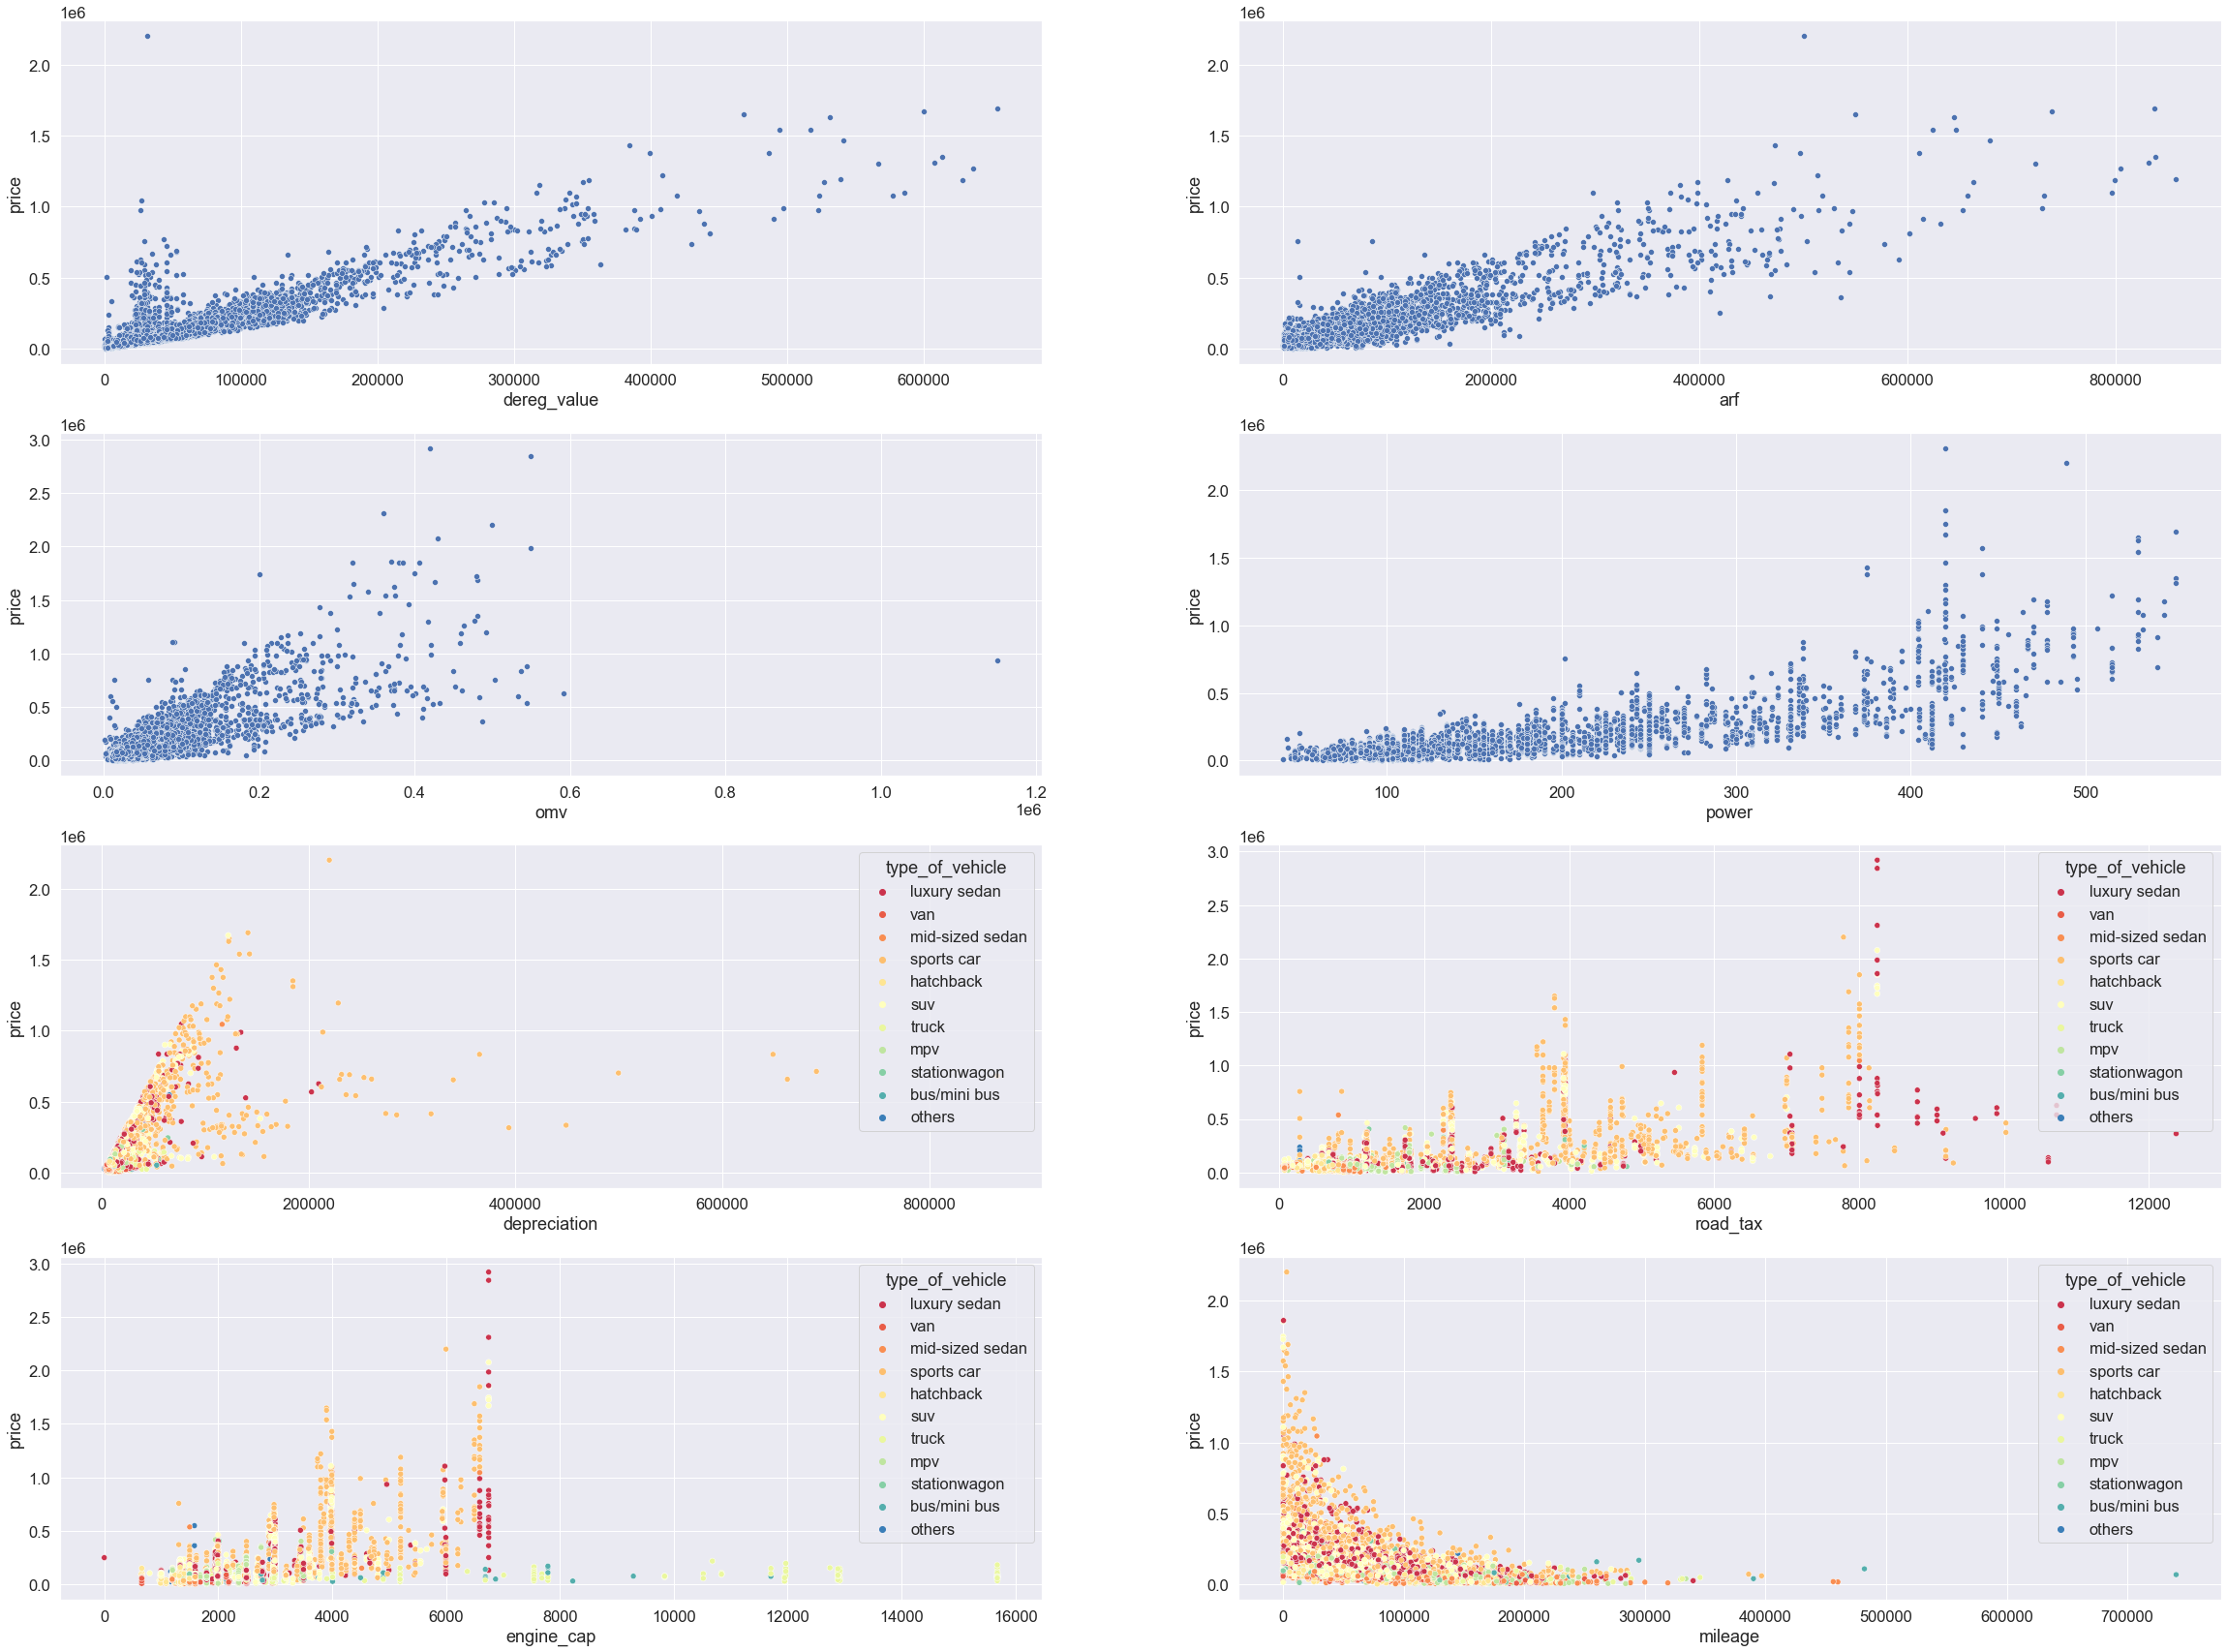

In [323]:
fig = plt.figure(figsize=(40, 30))
sns.set(font_scale=1.5)

# (Corr= 0.894838) dereg_value vs price
fig1 = fig.add_subplot(421); 
# sns.scatterplot(x = df['dereg_value'], y = df['price'], hue=df['type_of_vehicle'], palette= 'Spectral')
sns.scatterplot(x = df['dereg_value'], y = df['price'])

# (Corr= 0.884842) arf vs price
fig2 = fig.add_subplot(422); 
sns.scatterplot(x = df['arf'], y = df['price'])

# (Corr= 0.804580) omv vs price
fig3 = fig.add_subplot(423); 
sns.scatterplot(x = df['omv'], y = df['price'])

# (Corr= 0.769550) power vs price
fig4 = fig.add_subplot(424); 
sns.scatterplot(x = df['power'], y = df['price'])

# (Corr= 0.631857) depreciation vs price
fig5 = fig.add_subplot(425); 
sns.scatterplot(x = df['depreciation'], y = df['price'], hue=df['type_of_vehicle'], palette= 'Spectral')

# (Corr= 0.610242) road_tax vs price
fig6 = fig.add_subplot(426); 
sns.scatterplot(x = df['road_tax'], y = df['price'], hue=df['type_of_vehicle'], palette= 'Spectral')

# (Corr= 0.418161) engine_cap vs price
fig7 = fig.add_subplot(427); 
sns.scatterplot(x = df['engine_cap'], y = df['price'], hue=df['type_of_vehicle'], palette= 'Spectral')

# (Corr= -0.387148) mileage vs price
fig8 = fig.add_subplot(428); 
sns.scatterplot(x = df['mileage'], y = df['price'], hue=df['type_of_vehicle'], palette= 'Spectral')

### data processing 

1. date related cols -> transform into age [manufactured, original_reg_date, reg_date, lifespan]; create new col, old/new
2. high missing value ratio -> drop [original_reg_date, opc_scheme, lifespan, fuel_type, indicative_price]
3. high corr cols -> check outliers
4. curb_weight less than xx kg -> outliers
5. cols with missing values -> fillna by the mean of groupby on other cols
6. numberical cols -> normalization using RobustScaler()
7. title, description -> TF-IDF, top N words, each word calc its avg price for all the doc contain it, verify with corr later

#### Categorical Features

1. For column **make** :
   + fill missing values with the first word of **title** string
   + convert the column value to lowercase

In [324]:
df.loc[df['make'].isnull(), 'make'] = df['title'].str.split().str.get(0)
df['make'] = df['make'].str.lower() 
print((df['make']).to_string(index=True))

0                  bmw
1               toyota
2        mercedes-benz
3        mercedes-benz
4                honda
5        mercedes-benz
6                volvo
7        mercedes-benz
8               toyota
9                  bmw
10                 kia
11               honda
12             hyundai
13       mercedes-benz
14              nissan
15              toyota
16               mazda
17              toyota
18             ferrari
19              nissan
20          volkswagen
21              jaguar
22          volkswagen
23              toyota
24                opel
25               honda
26              toyota
27                mini
28              suzuki
29             porsche
30               honda
31               honda
32                 bmw
33               honda
34               mazda
35              toyota
36                 bmw
37          mitsubishi
38             porsche
39               honda
40               lexus
41               honda
42                 bmw
43         

In [325]:
make_onehot = pd.get_dummies(df['make'])
df.join(make_onehot).head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,skoda,ssangyong,subaru,suzuki,tesla,toyota,ud,volkswagen,volvo,yutong
0,1030324,BMW 3 Series 320i Gran Turismo M-Sport,bmw,320i,1 owner! 320i gt m-sports model! big brake kit...,2013.0,NaN,09-dec-2013,luxury sedan,"parf car, premium ad car, low mileage car",...,0,0,0,0,0,0,0,0,0,0
1,1021510,Toyota Hiace 3.0M,toyota,hiace,high loan available! low mileage unit. wear an...,2014.0,NaN,26-jan-2015,van,premium ad car,...,0,0,0,0,0,1,0,0,0,0
2,1026909,Mercedes-Benz CLA-Class CLA180,mercedes-benz,cla180,1 owner c&c unit. full agent service with 1 mo...,2016.0,NaN,25-jul-2016,luxury sedan,"parf car, premium ad car",...,0,0,0,0,0,0,0,0,0,0
3,1019371,Mercedes-Benz E-Class E180 Avantgarde,mercedes-benz,e180,"fully agent maintained, 3 years warranty 10 ye...",2019.0,NaN,17-nov-2020,luxury sedan,"parf car, almost new car, consignment car",...,0,0,0,0,0,0,0,0,0,0
4,1031014,Honda Civic 1.6A VTi,honda,civic,"kah motor unit! 1 owner, lowest 1.98% for full...",2019.0,NaN,20-sep-2019,mid-sized sedan,parf car,...,0,0,0,0,0,0,0,0,0,0


2. For column **transmission** :
   + only 2 unique values, apply binary encoding. 'manual' = 0, 'auto' = 1.

In [326]:
df['transmission'] = np.where(df['transmission'].str.contains('auto'), 1, 0)
df['transmission'].head()

0    1
1    0
2    1
3    1
4    1
Name: transmission, dtype: int64

3. For column **eco_category** :
   + contain only single value, remove the column

In [327]:
df.drop(columns=['eco_category'], inplace=True)

4. For column **type_of_vehicle** :
   + there are 11 unique values, apply one-hot encoding

In [328]:
df = df.join(pd.get_dummies(df['type_of_vehicle']))
df.drop(columns=['type_of_vehicle'], inplace=True)
df.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,category,transmission,...,hatchback,luxury sedan,mid-sized sedan,mpv,others,sports car,stationwagon,suv,truck,van
0,1030324,BMW 3 Series 320i Gran Turismo M-Sport,bmw,320i,1 owner! 320i gt m-sports model! big brake kit...,2013.0,NaN,09-dec-2013,"parf car, premium ad car, low mileage car",1,...,0,1,0,0,0,0,0,0,0,0
1,1021510,Toyota Hiace 3.0M,toyota,hiace,high loan available! low mileage unit. wear an...,2014.0,NaN,26-jan-2015,premium ad car,0,...,0,0,0,0,0,0,0,0,0,1
2,1026909,Mercedes-Benz CLA-Class CLA180,mercedes-benz,cla180,1 owner c&c unit. full agent service with 1 mo...,2016.0,NaN,25-jul-2016,"parf car, premium ad car",1,...,0,1,0,0,0,0,0,0,0,0
3,1019371,Mercedes-Benz E-Class E180 Avantgarde,mercedes-benz,e180,"fully agent maintained, 3 years warranty 10 ye...",2019.0,NaN,17-nov-2020,"parf car, almost new car, consignment car",1,...,0,1,0,0,0,0,0,0,0,0
4,1031014,Honda Civic 1.6A VTi,honda,civic,"kah motor unit! 1 owner, lowest 1.98% for full...",2019.0,NaN,20-sep-2019,parf car,1,...,0,0,1,0,0,0,0,0,0,0


5. For column **category** :
   + each data can contain multiple values, retrieve all unique values from the dataset
   + apply one-hot encoding

In [351]:
x = df['category'].str.split(', ', expand=True)

In [355]:
column_values = x.values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['parf car' 'premium ad car' 'low mileage car' None 'almost new car'
 'consignment car' 'imported used vehicle' 'coe car' 'rare & exotic'
 'direct owner sale' '-' 'electric cars' 'hybrid cars'
 'sgcarmart warranty cars' 'opc car' 'vintage cars' 'sta evaluated car']
